# Linear Regression cost 최소화의 TensorFlow 구현

## Simplified hypothesis

\begin{equation}
H(x) = Wx
\end{equation}

\begin{equation}
Cost(W) = \frac{1}{m} \sum_{i=1}^{m}(Wx^{(i)}-y^{(i)})^{2}
\end{equation}

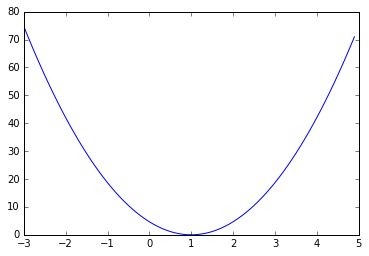

In [1]:
%matplotlib inline
# Lab 3 Minimizing Cost
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
# cost 함수를 그리기 위한 변수
W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

## Gradient Descent

\begin{equation}
Cost(W) = \frac{1}{m} \sum_{i=1}^{m}(Wx^{(i)}-y^{(i)})^{2}
\end{equation}

\begin{equation}
W := W - \alpha \frac{1}{m} \sum_{i=1}^{m} (Wx^{(i)} - y^{(i)})x^{(i)}
\end{equation}

위 수식은 다음처럼 코딩할 수 있음.

In [2]:
# Lab 3 Minimizing Cost
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Try to find values for W and b to compute y_data = W * x_data + b
# We know that W should be 1 and b should be 0
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.000196199 [ 1.00648403]
1 5.58083e-05 [ 1.00345814]
2 1.58727e-05 [ 1.00184429]
3 4.51458e-06 [ 1.0009836]
4 1.28461e-06 [ 1.00052464]
5 3.65236e-07 [ 1.00027978]
6 1.03953e-07 [ 1.00014925]
7 2.95924e-08 [ 1.00007963]
8 8.40479e-09 [ 1.00004244]
9 2.39406e-09 [ 1.00002265]
10 6.79378e-10 [ 1.00001204]
11 1.93381e-10 [ 1.00000644]
12 5.66018e-11 [ 1.00000346]
13 1.44998e-11 [ 1.00000179]
14 4.24431e-12 [ 1.00000095]
15 1.06108e-12 [ 1.00000048]
16 2.65269e-13 [ 1.00000024]
17 9.9476e-14 [ 1.00000012]
18 0.0 [ 1.]
19 0.0 [ 1.]
20 0.0 [ 1.]


Gradient Descent를 다음처럼 간단하게 할 수 있음.

W = 5.0을 초기값을 주었을 때 

cost가 최소가 되는 W를 찾는 프로그램

In [3]:
# Lab 3 Minimizing Cost
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

#for step in range(100):
for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.733334
2 0.982222
3 0.998815
4 0.999921
5 0.999995
6 1.0
7 1.0
8 1.0
9 1.0


W = 5.0을 초기값을 주었을 때

cost가 최소가 되는 W를 찾는 프로그램

In [4]:
# Lab 3 Minimizing Cost
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(-3.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

#for step in range(100):
for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.733334
2 0.982222
3 0.998815
4 0.999921
5 0.999995
6 1.0
7 1.0
8 1.0
9 1.0


수동으로 구한 gradient와 텐서플로 optimizer에서 구한 gvs(gradient)가 같은지 확인.

In [5]:
# Lab 3 Minimizing Cost
# This is optional
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.3613949, [(12.706352, 2.3613949)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.4703016, 2.0146751, [(9.4703016, 2.0146751)]]
15 [8.5864067, 1.9199722, [(8.5864067, 1.9199722)]]
16 [7.7850089, 1.8341081, [(7.7850089, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.3996239, 1.685674, [(6.3996239, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.62